In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Dimensional Tensors 1

In [2]:
v = torch.tensor([1,2,3,4,5,6]) #1 d tensor
v, v.dtype, v[0], v[1:4], v.ndim

(tensor([1, 2, 3, 4, 5, 6]), torch.int64, tensor(1), tensor([2, 3, 4]), 1)

In [3]:
f = torch.FloatTensor([1,2,3,4,5,6])
f.dtype, f.size()

(torch.float32, torch.Size([6]))

In [4]:
v.view(6,1), v.view(6,1).shape,  v.view(6,1).ndim # view is the same as reshape

(tensor([[1],
         [2],
         [3],
         [4],
         [5],
         [6]]),
 torch.Size([6, 1]),
 2)

In [5]:
v.view(3,-1) # -1 infers last arg

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [6]:
#convert np array to tensor
a = np.array([1,2,3,4,5])
tensor_cnv = torch.from_numpy(a)
tensor_cnv.type()

'torch.IntTensor'

In [7]:
#convert tensor to np
tensor_cnv.numpy()

array([1, 2, 3, 4, 5])

# Vector operations

In [8]:
t_one = torch.tensor([1, 2, 3])
t_two = torch.tensor([1, 2, 3])
t_one + t_two, t_one * t_two, t_one * 5, torch.dot(t_one, t_two)
#dot for 1d tensors

(tensor([2, 4, 6]), tensor([1, 4, 9]), tensor([ 5, 10, 15]), tensor(14))

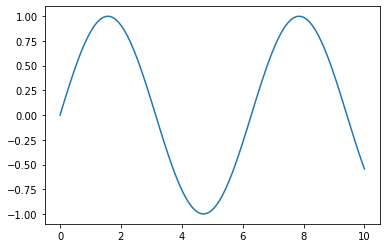

In [9]:
#matplotlib not supposed to work with pytorch but it works so thats cool
#in case it does not work, i must convert to numpy array with x.numpy()
x = torch.linspace(0,10,100)
y = torch.sin(x)
plt.plot(x,y)

# 2D tensors : 
Typically you deal with 2d tensors when working with grayscale images 

In [10]:
one_d = torch.arange(0,9)
one_d

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [11]:
two_d = one_d.view(3,3)
two_d, two_d.dim()

(tensor([[0, 1, 2],
         [3, 4, 5],
         [6, 7, 8]]),
 2)

In [12]:
two_d[1,2]

tensor(5)

In [13]:
x = torch.arange(18).view(3,2,3)
x

tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17]]])

# Slicing 3D tensors

In [14]:
x[2,1,0], x[:,1,1:]

(tensor(15),
 tensor([[ 4,  5],
         [10, 11],
         [16, 17]]))

# Matrix multiplication

In [15]:
mat_a = torch.tensor([0,3,5,5,5,2]).view(2,3)
mat_b = torch.tensor([3,4,3,-2,4,-2]).view(3,2)
mat_a, mat_b 

(tensor([[0, 3, 5],
         [5, 5, 2]]),
 tensor([[ 3,  4],
         [ 3, -2],
         [ 4, -2]]))

In [16]:
torch.matmul(mat_a, mat_b), np.dot(mat_a,mat_b) # same as np.dot

(tensor([[ 29, -16],
         [ 38,   6]]),
 array([[ 29, -16],
        [ 38,   6]], dtype=int64))

In [17]:
mat_a @ mat_b # same

tensor([[ 29, -16],
        [ 38,   6]])

# Gradient with pytorch

In [18]:
x1 = torch.tensor(2.0, requires_grad=True)
x2 = torch.tensor(1.0, requires_grad=True)
x3 = torch.tensor(3, requires_grad=False)
y = 3*x1**2 + x1*3*x2**2 +3*x3*2
y.backward()
# loss.backward() computes dloss/dx for every parameter x which has requires_grad=True. These are accumulated into x.grad for every parameter x. In pseudo-code:
x1.grad, x2.grad, x3.grad

(tensor(15.), tensor(12.), None)